In [4]:
# Import the required libraries and dependencies
import pandas as pd

import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
%matplotlib inline

In [7]:

account_df = pd.read_csv("account_predict_data.csv")
account_df.head()


,gender,tenure,phone_services,internet_services,contract_duration,payment_method,number_customer_service_calls,phone_min,internet_min,phone_monthly_charges,...,churn,trigger_point,churn_surv,uuid,trigger_price,trigger_quality,trigger_external,cluster,treatment,churn_after_treatment
0,Female,1,1,1,short-term,mail,2,112.236770,5913.555587,19.082281,...,0,0,0,95475c60-febf-11ec-ac44-0242ac1c0002,0,0,0,6,NaN,0
1,Male,1,1,1,short-term,email,1,122.333978,3888.080228,20.798307,...,0,0,0,95475cd8-febf-11ec-ac44-0242ac1c0002,0,0,0,6,NaN,0
2,Male,1,0,1,short-term,mail,2,0.000000,2941.437280,0.000000,...,0,0,0,95475dc8-febf-11ec-ac44-0242ac1c0002,0,0,0,4,NaN,0
3,Female,1,1,1,short-term,mail,2,115.213725,4417.942375,19.589318,...,0,0,0,95475eae-febf-11ec-ac44-0242ac1c0002,0,0,0,6,NaN,0
4,Male,1,0,1,short-term,mail,2,0.000000,2790.804987,0.000000,...,0,0,0,954761ce-febf-11ec-ac44-0242ac1c0002,0,0,0,4,NaN,0


,tenure,churn,the_counts
0,0,0.000000,3
1,1,0.632184,174
2,2,0.603175,63
3,3,0.446429,56
4,4,0.369565,46
5,5,0.461538,39
6,6,0.200000,30
7,7,0.352941,34


,tenure,churn,the_counts
65,65,0.071429,28
66,66,0.157895,19
67,67,0.058824,17
68,68,0.040000,25
69,69,0.000000,26
70,70,0.058824,34
71,71,0.121951,41
72,72,0.018692,107


<Axes: ylabel='Frequency'>

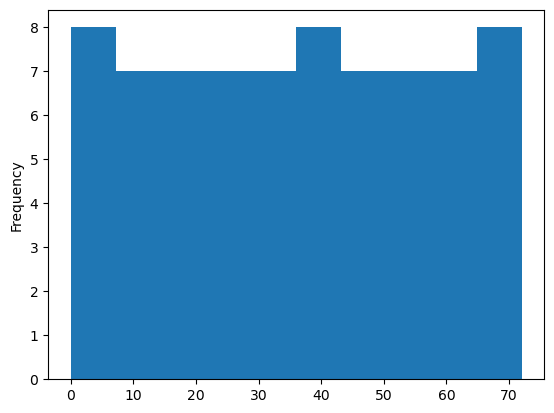

In [8]:
account_df_gender = account_df[["tenure","churn"]]
account_df_gender.head()
tenure_group = account_df_gender.groupby("tenure")
tenure_results = tenure_group.sum() / tenure_group.count() 
tenure_results["the_counts"] = tenure_group.count() 
tenure_results.reset_index(inplace=True)
display(tenure_results.head(8))
display(tenure_results.tail(8))

tenure_results["tenure"].plot.hist()

In [16]:
def closest(K,lst):
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
    # code above is from https://www.geeksforgeeks.org/python-find-closest-number-to-k-in-given-list/

# brute force method
def bin_tenure(tenure):
    if tenure < 15:
        return '0-15'
    if tenure < 30:
        return '15-30'
    if tenure < 45:
        return '30-45'
    # excetera...
    


bins = [10*x for x in range(8)]
print("The bins boundries are",bins)
print("")

# sanity check for closest function above
print(f"for 5, we have: {closest(5,bins)}")
print(f"for 5.1, we have: {closest(5.1, bins)}")
print(f"for 19, we have: {closest(19,bins)}")
print(f"for 72, we have: {closest(72,bins)}")


account_df["tenure_9_bin"] = account_df.apply(lambda x: closest(x['tenure'], bins),axis=1)
account_df[["tenure","tenure_9_bin"]].tail()
# account_df[["tenure","tenure_9_bin"]].iloc[200:]


The bins boundries are [0, 10, 20, 30, 40, 50, 60, 70]

for 5, we have: 0
for 5.1, we have: 10
for 19, we have: 20
for 72, we have: 70


,tenure,tenure_9_bin
200,2,0
201,2,0
202,2,0
203,2,0
204,2,0
...,...,...
1931,39,40
1932,39,40
1933,39,40
1934,39,40


In [37]:
the_columns = account_df.columns
account_df.nunique()

columns_to_code = ['tenure','number_customer_service_calls','phone_min','internet_min','phone_monthly_charges','internet_monthly_charges','avg_monthly_bill','trigger_point','cluster']

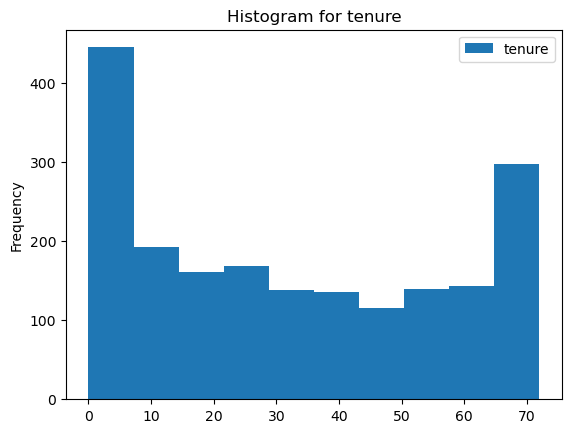

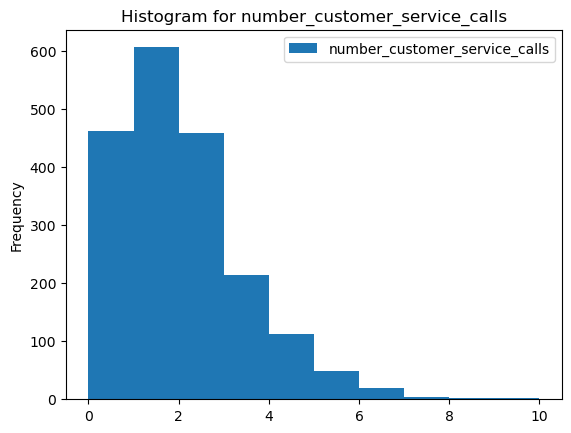

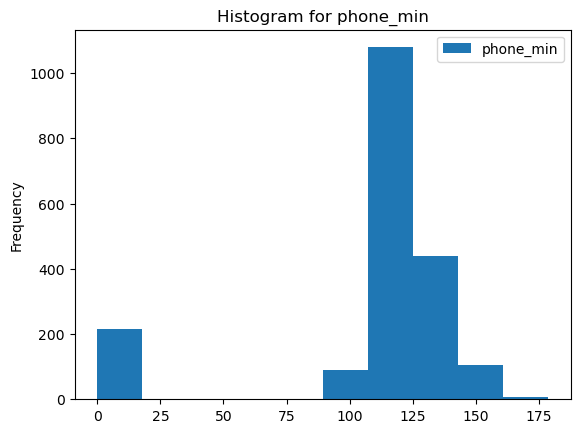

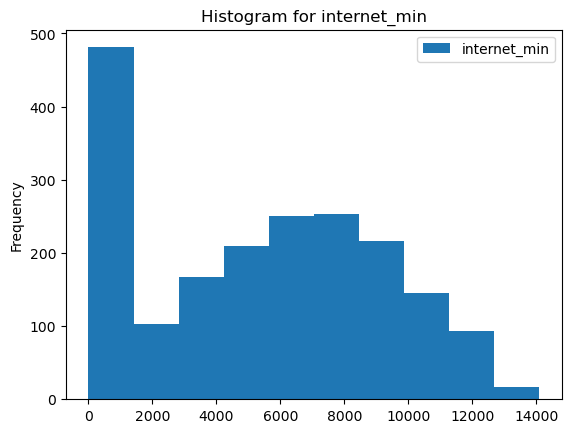

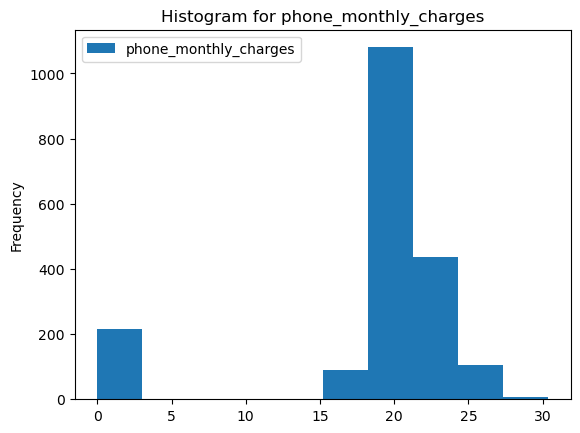

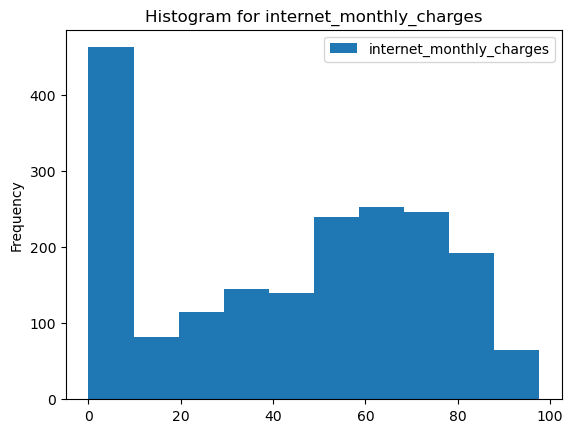

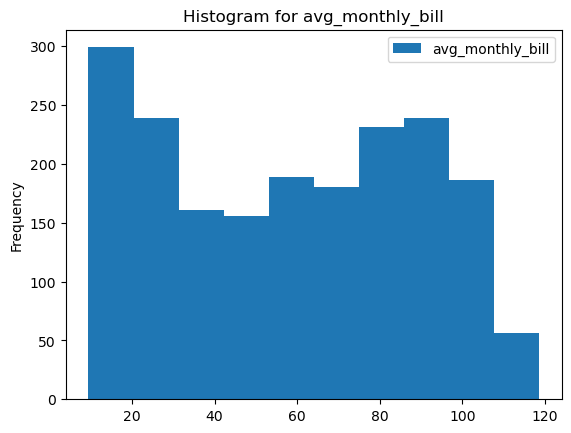

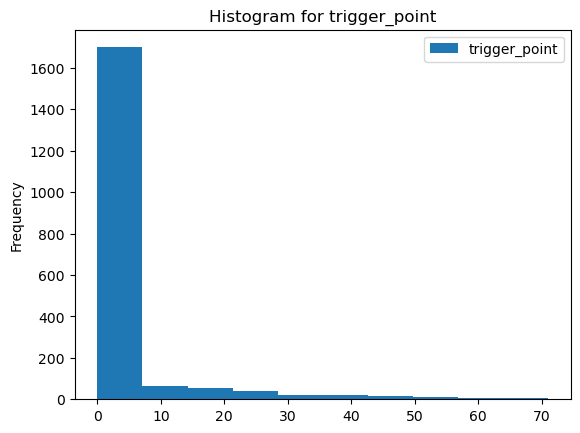

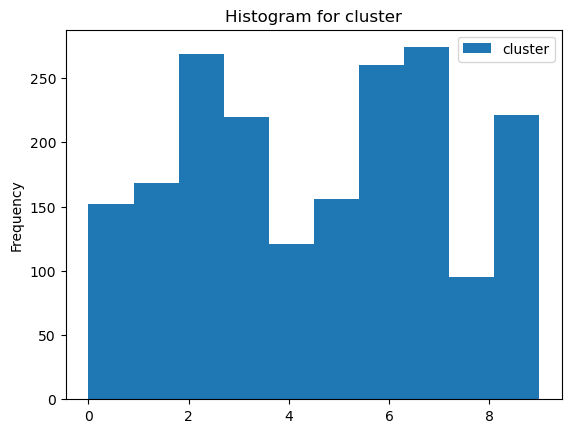

In [40]:
def hist_of_column(df,the_column):
    df_column = df[[the_column]]
    df_column.plot.hist(title=f"Histogram for {the_column}")


 # print(df_column.head())
    # col_group = df_column.groupby(the_column)
    # print("col group sum is: ",col_group.sum())
    # print("------------------------")
    # col_results = col_group.sum() / col_group.count()
    # col_results.reset_index()
    # print("col results: ",col_results)
    # # col_results["the_counts"] = col_group.count()
    # print("col_group head...")
    # print(col_group.head())
    # print("----------- now col group counts")
    # print(col_group.count())
    # col_results.reset_index(inplace=True)
    # print("for column: ",the_column)
    # display(col_results.head())
    # display(col_results.tail())

# to do all at once...
for the_column in columns_to_code:
    hist_of_column(account_df,the_column)
    
    
# hist_of_column(account_df,"phone_min")

In [66]:
columns_to_code
coded_columns = [x +"_bin" for x in columns_to_code]
print("coded_columns are...")
print(coded_columns)

print("--------------  Now name of the actual bin lists -----------------")
bins_list_names = ["bin_list_4_" + x for x in columns_to_code]
print("bins_list_names are...")
print(bins_list_names)


# 'bin_list_4_tenure', 'bin_list_4_number_customer_service_calls', 'bin_list_4_phone_min', 'bin_list_4_internet_min', 'bin_list_4_phone_monthly_charges', 
# # 'bin_list_4_internet_monthly_charges', 'bin_list_4_avg_monthly_bill', 'bin_list_4_trigger_point', 'bin_list_4_cluster']
bin_list_4_tenure = [10*x for x in range(8)]
bin_list_4_number_customer_service_calls = [x for x in range(9)]
bin_list_4_phone_min = [15,95,115,135,155]
bin_list_4_internet_min = [2000 * x for x in range(7)]
bin_list_4_phone_monthly_charges = [5*x for x in range(7)]
bin_list_4_internet_monthly_charges = [10 * x for x in range(11)]
bin_list_4_avg_monthly_bill = [25*x for x in range(6)]
bin_list_4_trigger_point = [0,5,10,20,30,40,50,60]
bin_list_4_cluster = [x for x in range(9)]

print("")
print("-------------------------------")
print('bin_list_4_tenure...')
print(bin_list_4_tenure)
print("")

print('bin_list_4_number_customer_service_calls')
print(bin_list_4_number_customer_service_calls)
print("")

print('bin_list_4_phone_min')
print(bin_list_4_phone_min)
print("")

print('bin_list_4_internet_min' )
print(bin_list_4_internet_min )
print("")

print('bin_list_4_phone_monthly_charges')
print(bin_list_4_phone_monthly_charges)
print("")


print('bin_list_4_internet_monthly_charges')
print(bin_list_4_internet_monthly_charges)
print("")


print('bin_list_4_avg_monthly_bill')
print(bin_list_4_avg_monthly_bill)
print("")

print('bin_list_4_trigger_point')
print(bin_list_4_trigger_point)
print("")

print('bin_list_4_cluster')
print(bin_list_4_cluster)
print("")

bin_lists = [bin_list_4_tenure, bin_list_4_number_customer_service_calls, bin_list_4_phone_min, bin_list_4_internet_min, bin_list_4_phone_monthly_charges, \
    bin_list_4_internet_monthly_charges, bin_list_4_avg_monthly_bill, bin_list_4_trigger_point, bin_list_4_cluster]



bin_dict  = [{bins_list_names[x]:bin_lists[x] for x in range(len(bins_list_names))}]
print("bin list one")
bin_dict

coded_columns are...
['tenure_bin', 'number_customer_service_calls_bin', 'phone_min_bin', 'internet_min_bin', 'phone_monthly_charges_bin', 'internet_monthly_charges_bin', 'avg_monthly_bill_bin', 'trigger_point_bin', 'cluster_bin']
--------------  Now name of the actual bin lists -----------------
bins_list_names are...
['bin_list_4_tenure', 'bin_list_4_number_customer_service_calls', 'bin_list_4_phone_min', 'bin_list_4_internet_min', 'bin_list_4_phone_monthly_charges', 'bin_list_4_internet_monthly_charges', 'bin_list_4_avg_monthly_bill', 'bin_list_4_trigger_point', 'bin_list_4_cluster']

-------------------------------
bin_list_4_tenure...
[0, 10, 20, 30, 40, 50, 60, 70]

bin_list_4_number_customer_service_calls
[0, 1, 2, 3, 4, 5, 6, 7, 8]

bin_list_4_phone_min
[15, 95, 115, 135, 155]

bin_list_4_internet_min
[0, 2000, 4000, 6000, 8000, 10000, 12000]

bin_list_4_phone_monthly_charges
[0, 5, 10, 15, 20, 25, 30]

bin_list_4_internet_monthly_charges
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90,

[{'bin_list_4_number_customer_service_calls': [0, 1, 2, 3, 4, 5, 6, 7, 8]}]

Cody's function:

Inputs:  
1) updated data frame including the new coded columns 
2) list of coded columns



Outputs:
1) data frames of the aggregations. Includes the coded column and the summary churn % for that column.
2) separate function to use these dataframes and return the plots.